In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\prksh\Downloads\adease_data\train_1.csv")
df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking Out the Null values

In [3]:
print(df.isna().sum())
null_counts = df.isna().sum().reset_index().drop(0)
null_counts.columns = ['Date', 'null_counts']

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64


In [4]:
null_counts.set_index('Date', inplace=True)

Text(0, 0.5, 'No. of null values')

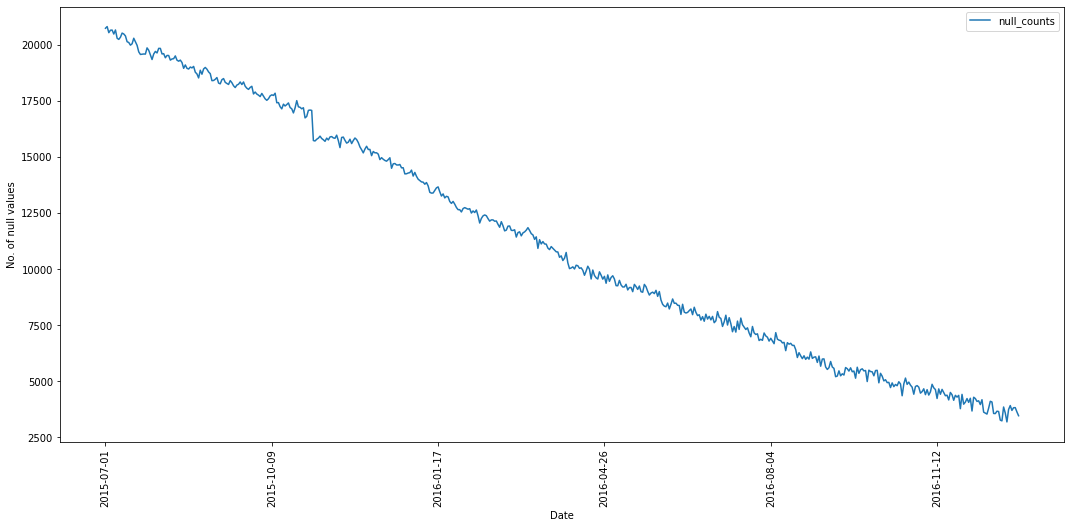

In [5]:

null_counts.plot(figsize=(18,8));
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("No. of null values")

It is clear from the plot that the null values decreases by the date, this may be due the fact that a lot of pages were released/launched after a certain date. This indicates the actual situation with the data and business rather than an anamoly. 

Handling Null Values

In [6]:
## We can drop articles which have null values in 70% dataset6

null_counts_art = df.T.isna().sum().reset_index()
null_counts_art.columns = ['article', 'null_count']

In [7]:
d_list = null_counts_art[null_counts_art['null_count']>=round(0.7*df.shape[1],0)]['article'].to_list()

In [8]:
df.drop(d_list,inplace=True)
df.fillna(0, inplace=True)

## EDA

Preprocesing

In [9]:
import re

strings = df['Page'].to_list()

# language flag extraction
regex = r'_(\w{2})\.wikipedia\.or'

language_flags = []
for string in strings:
    match = re.search(regex, string)
    if match:
        language_flags.append(match.group(1))
    else:
        language_flags.append("others")

print(f'Labelled Results\tTotal articles\n{len(language_flags)}\t\t\t{len(strings)}')
print(f'{np.unique(language_flags, return_counts=True)[0]}\n{np.unique(language_flags, return_counts=True)[1]}')

Labelled Results	Total articles
138956			138956
['de' 'en' 'es' 'fr' 'ja' 'others' 'ru' 'zh']
[17815 23322 13751 17345 19676 16111 14673 16263]


In [10]:
df['lang_flags'] = language_flags
df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,lang_flags
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0,zh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145028,Chavín_(cultura)_es.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,8.0,2.0,14.0,2.0,2.0,8.0,3.0,3.0,es
145029,Winifer_Fernández_es.wikipedia.org_all-access_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,2.0,4.0,2.0,4.0,6.0,4.0,1.0,es
145030,Cazafantasmas_(película_de_2016)_es.wikipedia....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,3.0,1.0,3.0,1.0,0.0,1.0,2.0,es
145031,Anexo:Tenis_en_los_Juegos_Olímpicos_de_Río_de_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,2.0,6.0,4.0,1.0,7.0,1.0,2.0,2.0,es


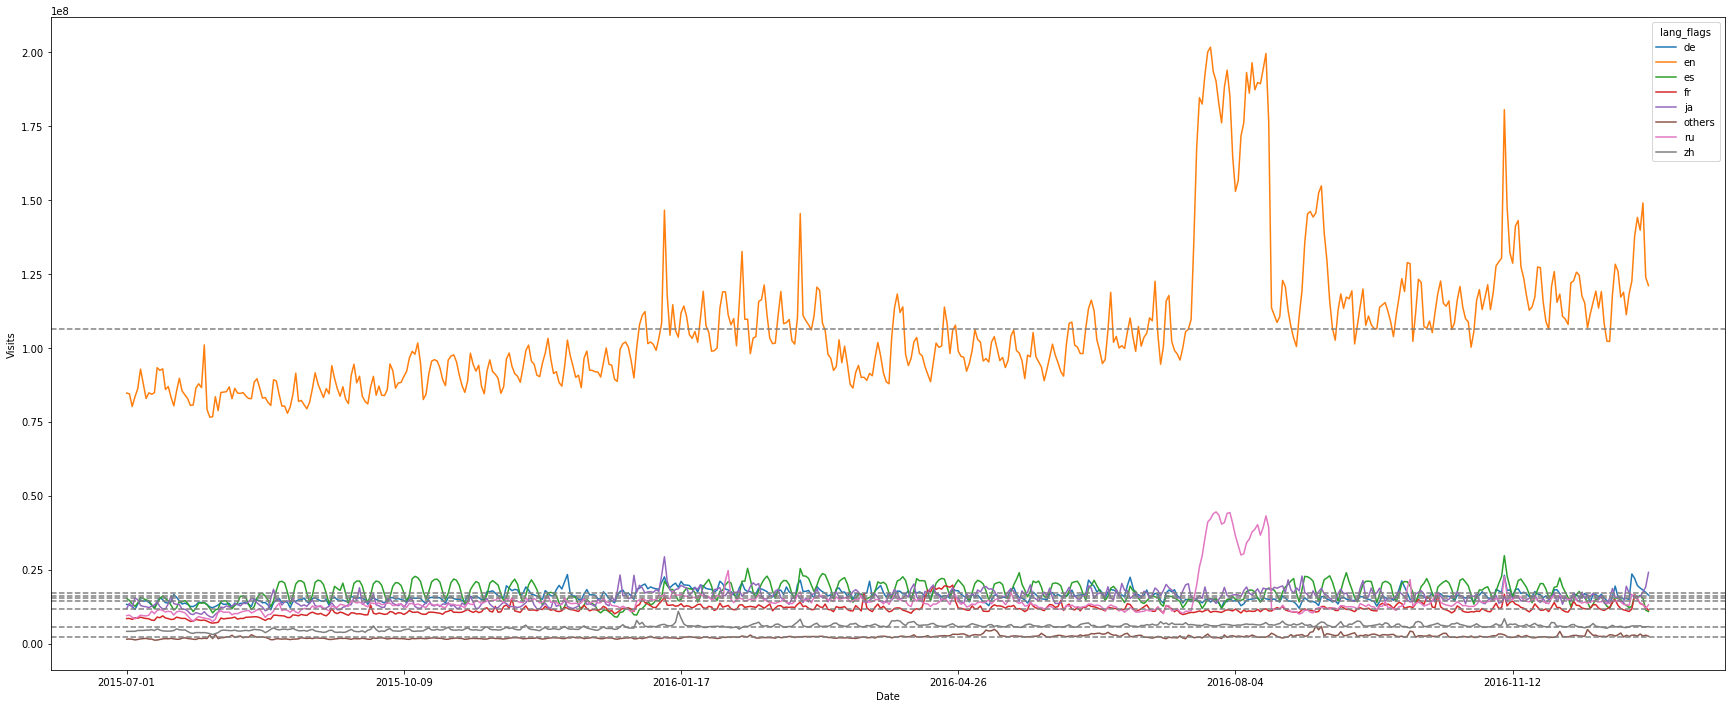

In [11]:
l_df_sum = df.groupby('lang_flags').sum().T
l_df_sum.plot(figsize=(30,12));
plt.xlabel('Date')
plt.ylabel('Visits')

for i in l_df_sum.columns:
    plt.axhline(l_df_sum[i].mean(), color='grey', linestyle='--')

English beats other languages by a huge margin of total visits

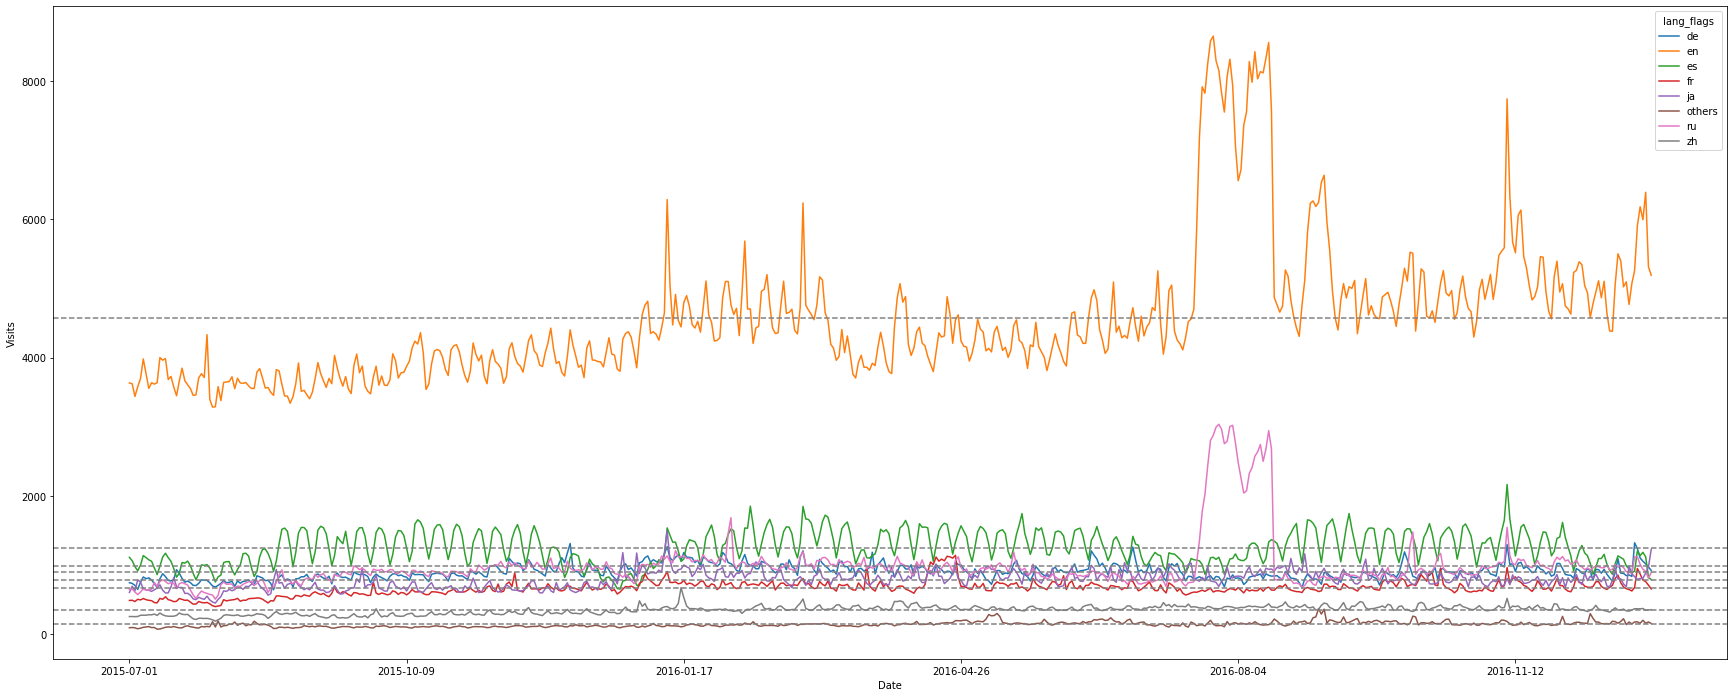

In [12]:
l_df_avg = df.groupby('lang_flags').mean().T
l_df_avg.plot(figsize=(30,12));
plt.xlabel('Date')
plt.ylabel('Visits')

for i in l_df_avg.columns:
    plt.axhline(l_df_avg[i].mean(), color='grey', linestyle='--')

A similar observation is seen here as well, the english language beats the other languages by a high margin of average visits.

#### Overall

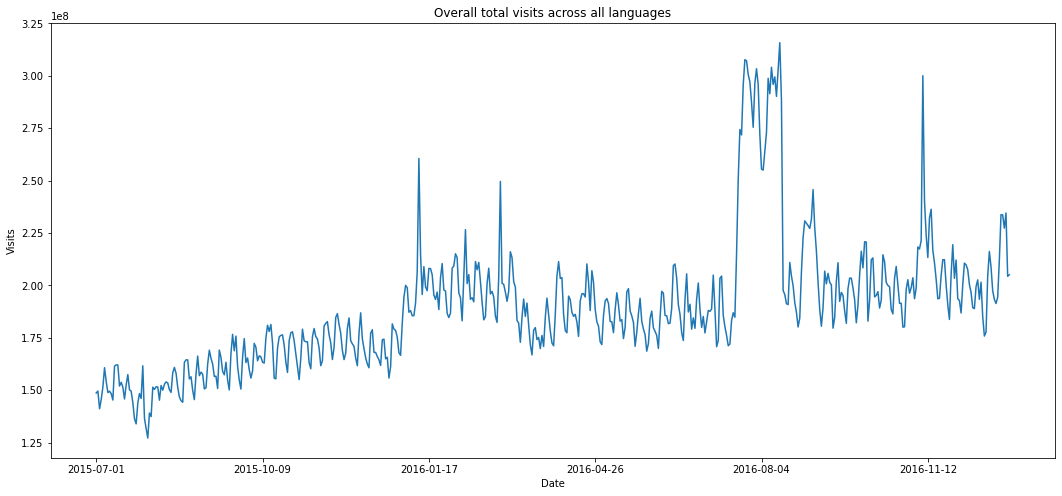

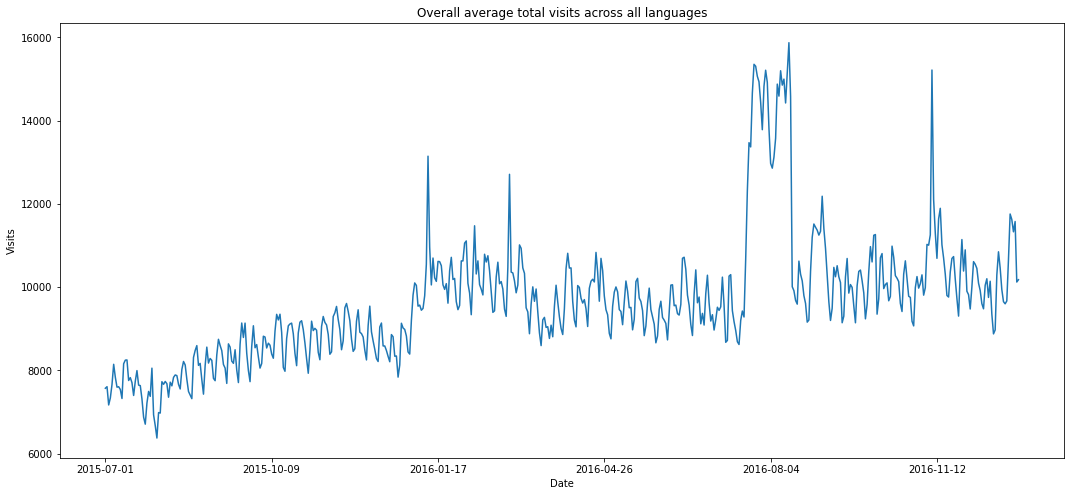

In [13]:
l_df_sum.sum(axis=1).plot(figsize=(18,8))
plt.title('Overall total visits across all languages')
plt.xlabel('Date')
plt.ylabel('Visits')
plt.show()
## Better to summarize/groupby by mean

l_df_avg.sum(axis=1).plot(figsize=(18,8))
plt.title('Overall average total visits across all languages')
plt.xlabel('Date')
plt.ylabel('Visits')
plt.show()

In [14]:
l_df_sum['Exog'] = pd.read_csv('https://raw.githubusercontent.com/atomikkus/time_series/main/Exog_Campaign_eng')['Exog'].to_list()
l_df_avg['Exog'] = pd.read_csv('https://raw.githubusercontent.com/atomikkus/time_series/main/Exog_Campaign_eng')['Exog'].to_list()

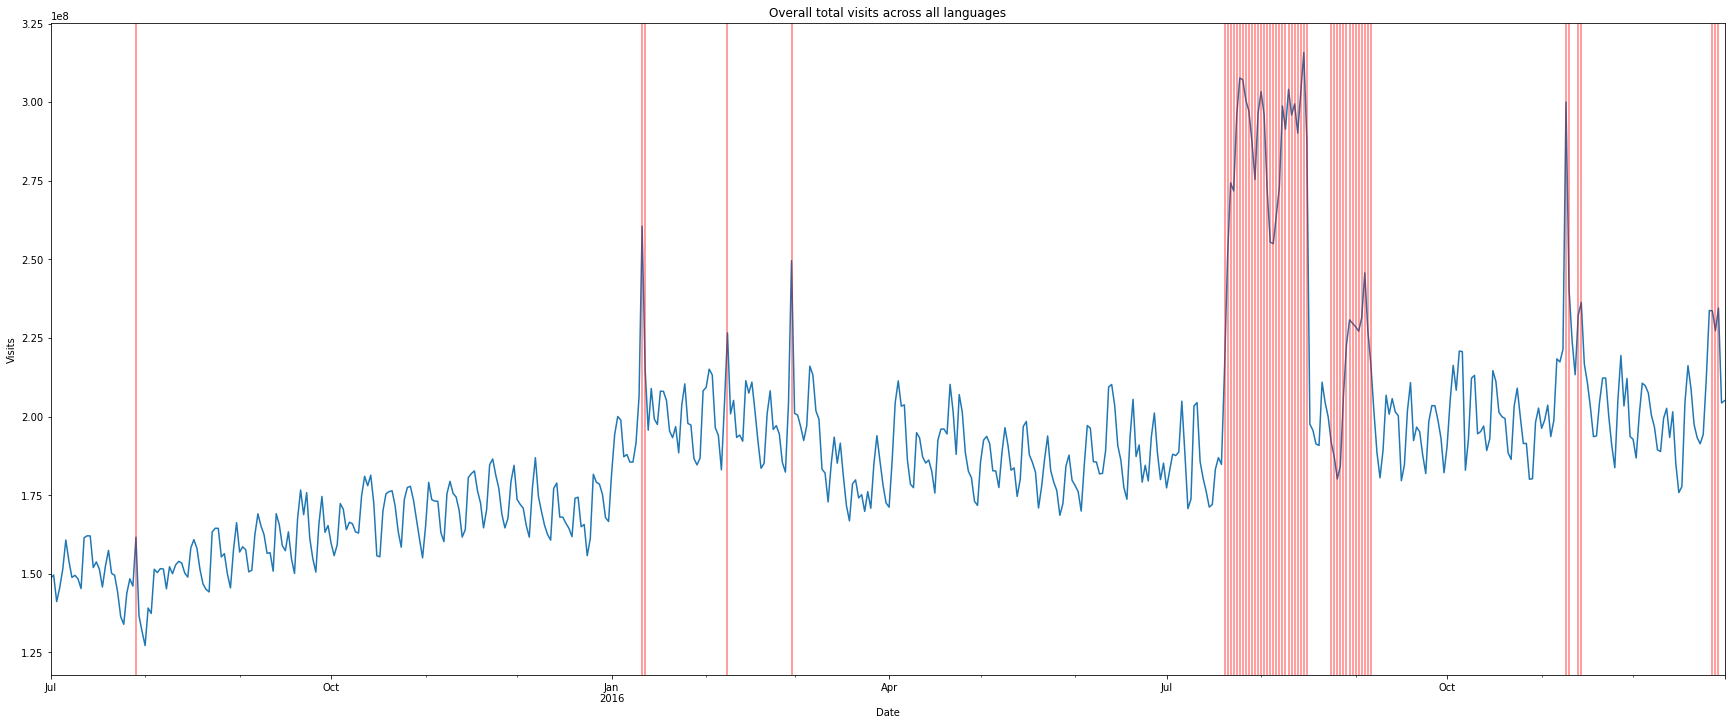

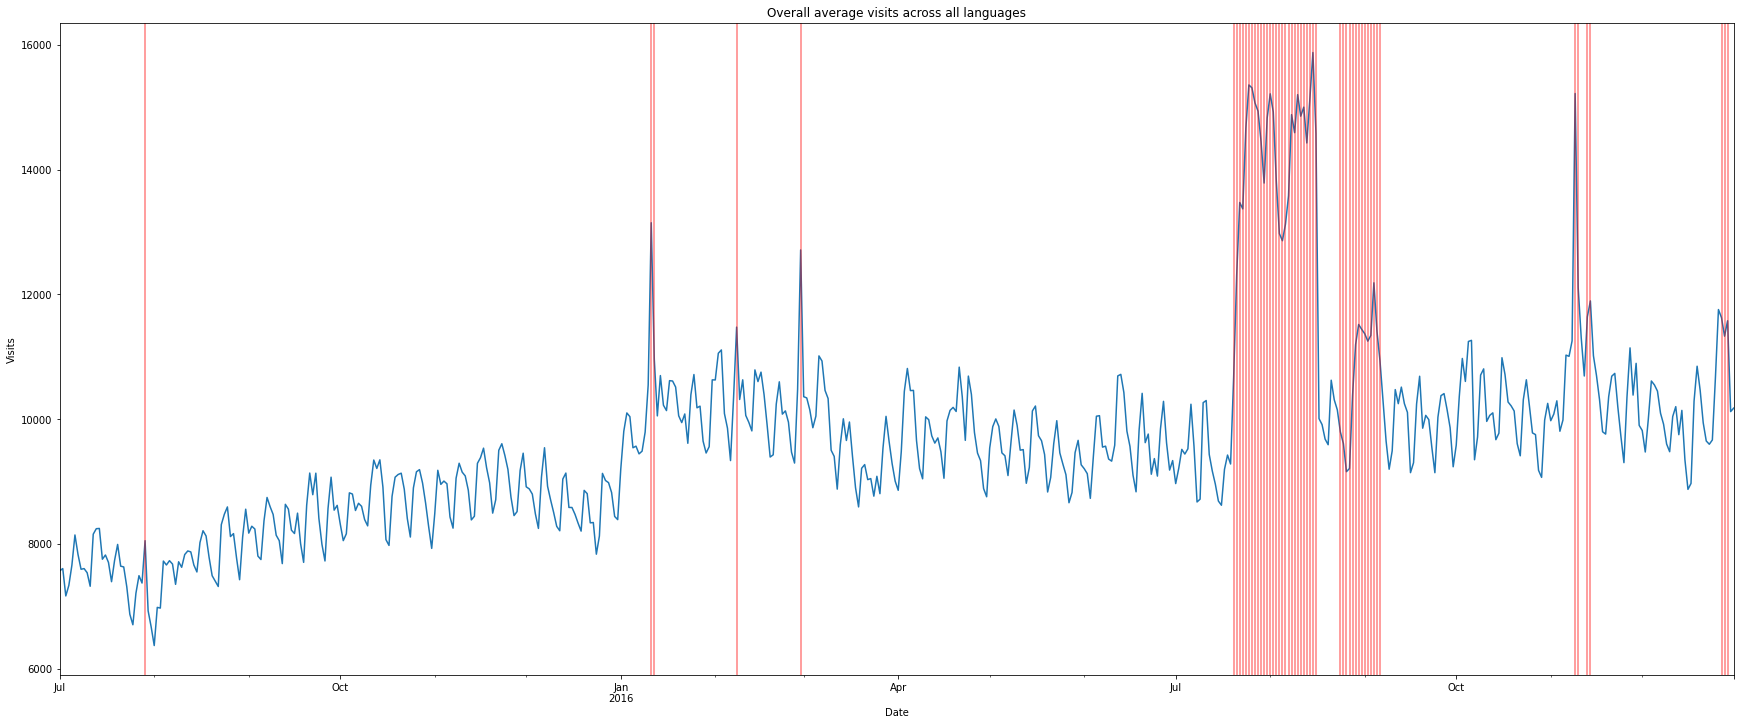

In [15]:
import matplotlib.pyplot as plt

l_df_sum.index = pd.to_datetime(l_df_sum.index)
l_df_avg.index = pd.to_datetime(l_df_avg.index)

# Sum the values across all columns
l_df_sum.sum(axis=1).plot(figsize=(30, 12))
plt.title('Overall total visits across all languages')
plt.xlabel('Date')
plt.ylabel('Visits')
for i in l_df_sum.index:
    if l_df_sum.at[i, 'Exog'] == 1:
        plt.axvline(x=i, color='r', alpha=0.5)

plt.show()

# Sum the values across all columns
l_df_avg.sum(axis=1).plot(figsize=(30, 12))
plt.title('Overall average visits across all languages')
plt.xlabel('Date')
plt.ylabel('Visits')
for i in l_df_avg.index:
    if l_df_avg.at[i, 'Exog'] == 1:
        plt.axvline(x=i, color='r', alpha=0.5)

plt.show()

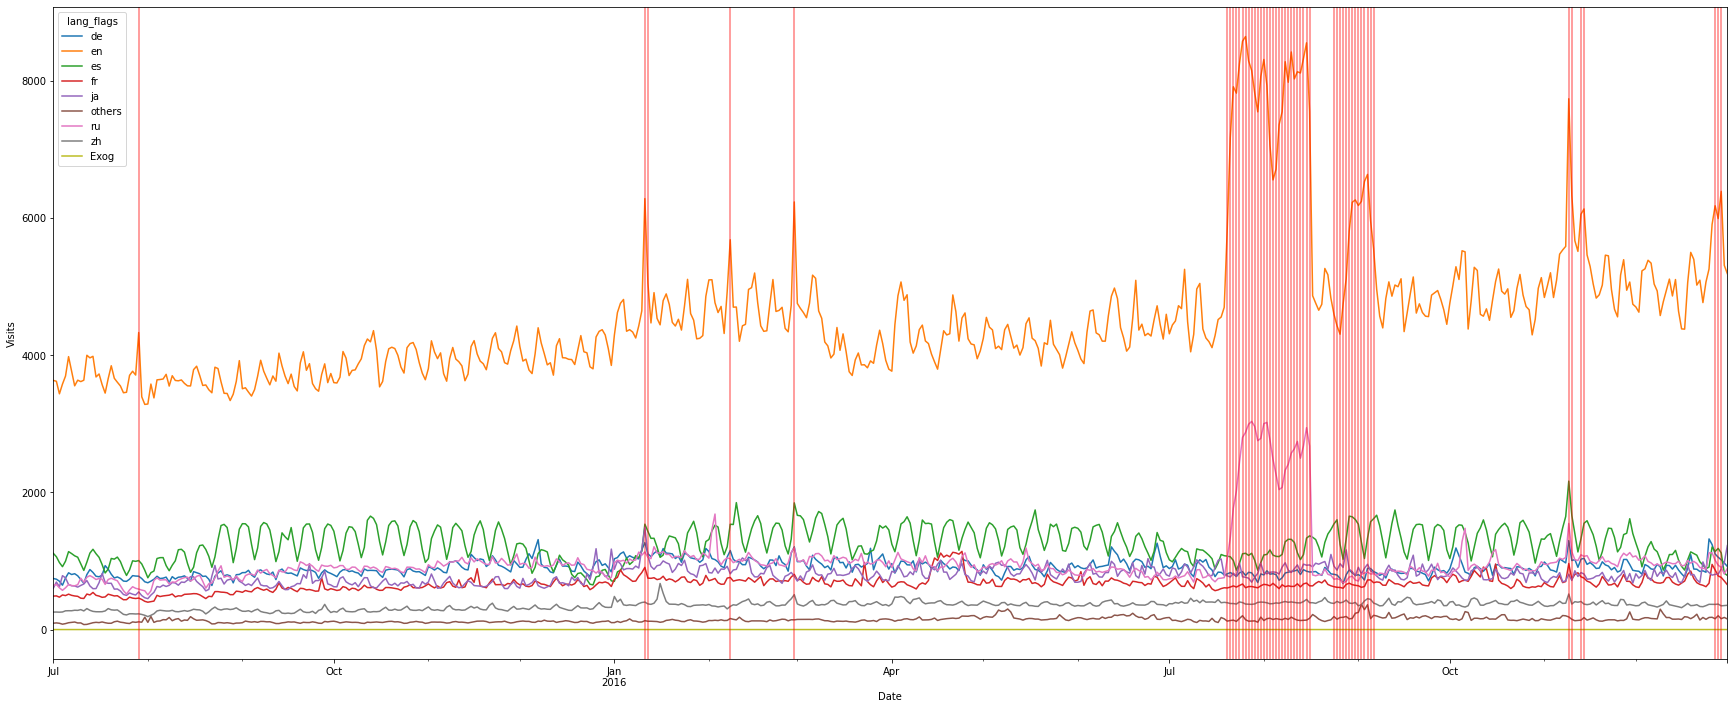

In [16]:
l_df_avg.plot(figsize=(30,12));
plt.xlabel('Date')
plt.ylabel('Visits')

for i in l_df_avg.index:
    if l_df_avg.at[i, 'Exog'] == 1:
        plt.axvline(x=i, color='r', alpha=0.5)

plt.show()

## Stationarity, decomposition, detrending, ACF, and PACF

In [17]:
## Stationarity Tests
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    result = adfuller(timeseries.dropna())  # Drop NA values for the test
    return {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Value (1%)': result[4]['1%'],
        'Critical Value (5%)': result[4]['5%'],
        'Critical Value (10%)': result[4]['10%']
    }



results = []

for column in l_df_avg.columns:
    if column != 'Exog':
        result = test_stationarity(l_df_avg[column])
        result['Column'] = column
        results.append(result)

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Reorder columns for better readability
results_df = results_df[['Column', 'ADF Statistic', 'p-value', 'Critical Value (1%)', 'Critical Value (5%)', 'Critical Value (10%)']]
results_df

,Column,ADF Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%)
0,de,-2.431324,0.133090,-3.442678,-2.866978,-2.569666
1,en,-2.299339,0.172181,-3.442632,-2.866957,-2.569655
2,es,-2.994316,0.035429,-3.442655,-2.866968,-2.569661
3,fr,-2.887208,0.046856,-3.442609,-2.866947,-2.569650
4,ja,-2.615697,0.089796,-3.442495,-2.866897,-2.569623
5,others,-3.449310,0.009388,-3.442473,-2.866887,-2.569618
6,ru,-3.922091,0.001878,-3.442384,-2.866848,-2.569597
7,zh,-1.792478,0.384203,-3.442749,-2.867009,-2.569683


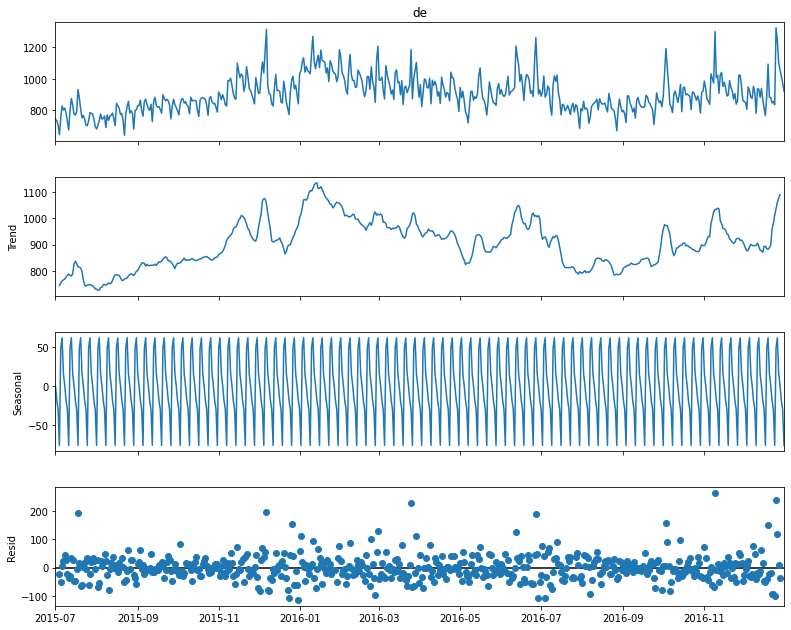

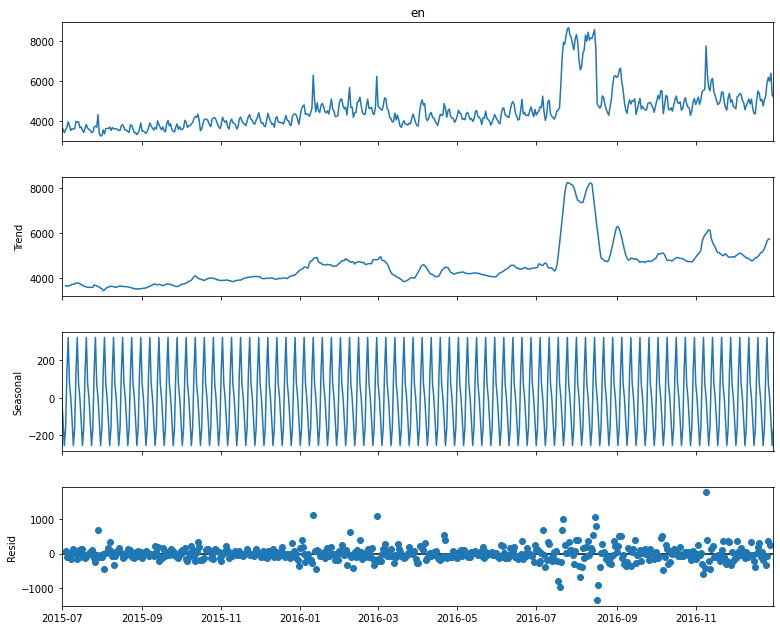

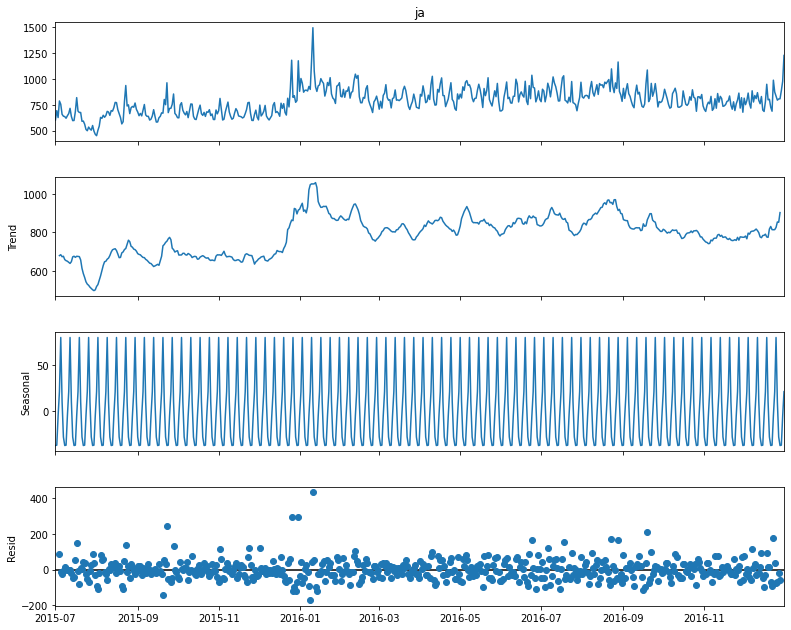

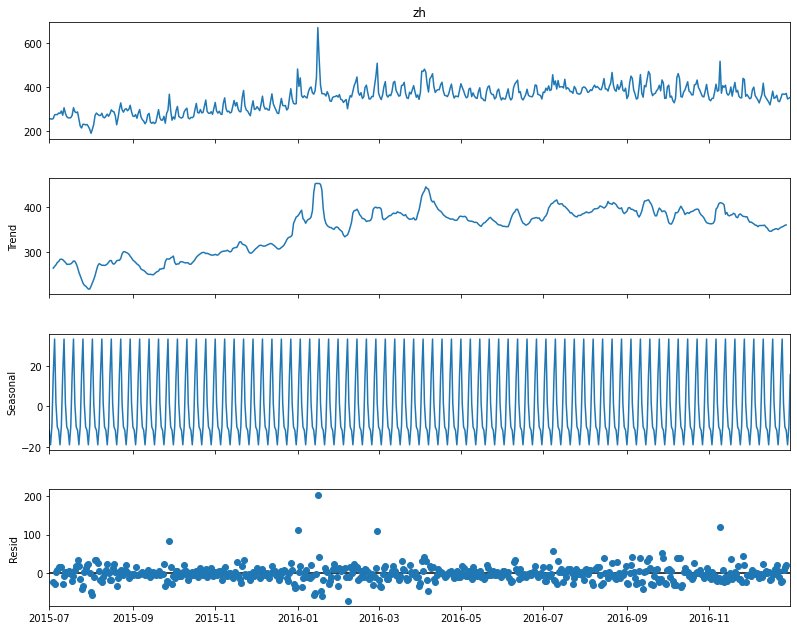

In [18]:
for i in ['de', 'en', 'ja', 'zh']:
    decomposition = sm.tsa.seasonal_decompose(l_df_avg[i], model='additive')
    fig = decomposition.plot()
    fig.set_size_inches(12, 10) 



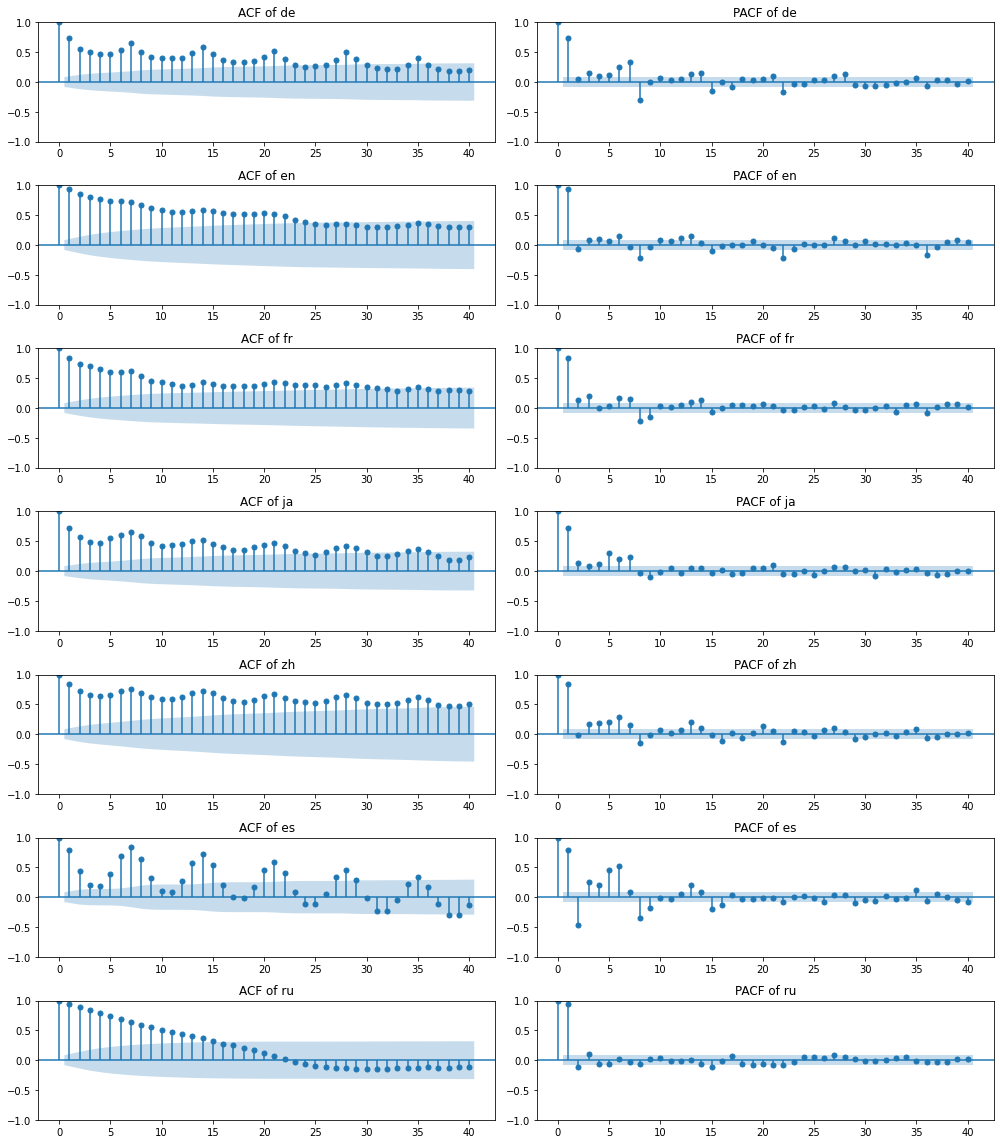

In [19]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create a 8x2 grid
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 16))

# Flatten axes array for easier indexing
axes = axes.flatten()

# List of columns
columns = ['de', 'en', 'fr', 'ja', 'zh', 'es', 'ru']

# Plot ACF and PACF for each column
for i, column in enumerate(columns):
    # ACF
    plot_acf(l_df_avg[column].dropna(), lags=40, ax=axes[2*i])
    axes[2*i].set_title(f'ACF of {column}')
    
    # PACF
    plot_pacf(l_df_avg[column].dropna(), lags=40, ax=axes[2*i + 1])
    axes[2*i + 1].set_title(f'PACF of {column}')

# Adjust layout
plt.tight_layout()
plt.show()


In [20]:
# Function to perform differencing
def differencing(timeseries, lag=7):
    return timeseries.diff(periods=lag).dropna()


test_df = l_df_avg.copy()
# Apply differencing and test stationarity
results = []

for column in ['de', 'en', 'ja', 'zh']:
    if column != 'Exog':
        differenced_series = differencing(test_df[column])
        result = test_stationarity(differenced_series)
        result['Language'] = column
        results.append(result)

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Reorder columns for better readability
results_df = results_df[['Language', 'ADF Statistic', 'p-value', 'Critical Value (1%)', 'Critical Value (5%)', 'Critical Value (10%)']]
results_df

,Language,ADF Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%)
0,de,-5.763374,5.605000e-07,-3.442915,-2.867082,-2.569722
1,en,-5.130774,1.215315e-05,-3.442915,-2.867082,-2.569722
2,ja,-6.337715,2.803875e-08,-3.442796,-2.867030,-2.569694
3,zh,-6.991304,7.732402e-10,-3.442915,-2.867082,-2.569722


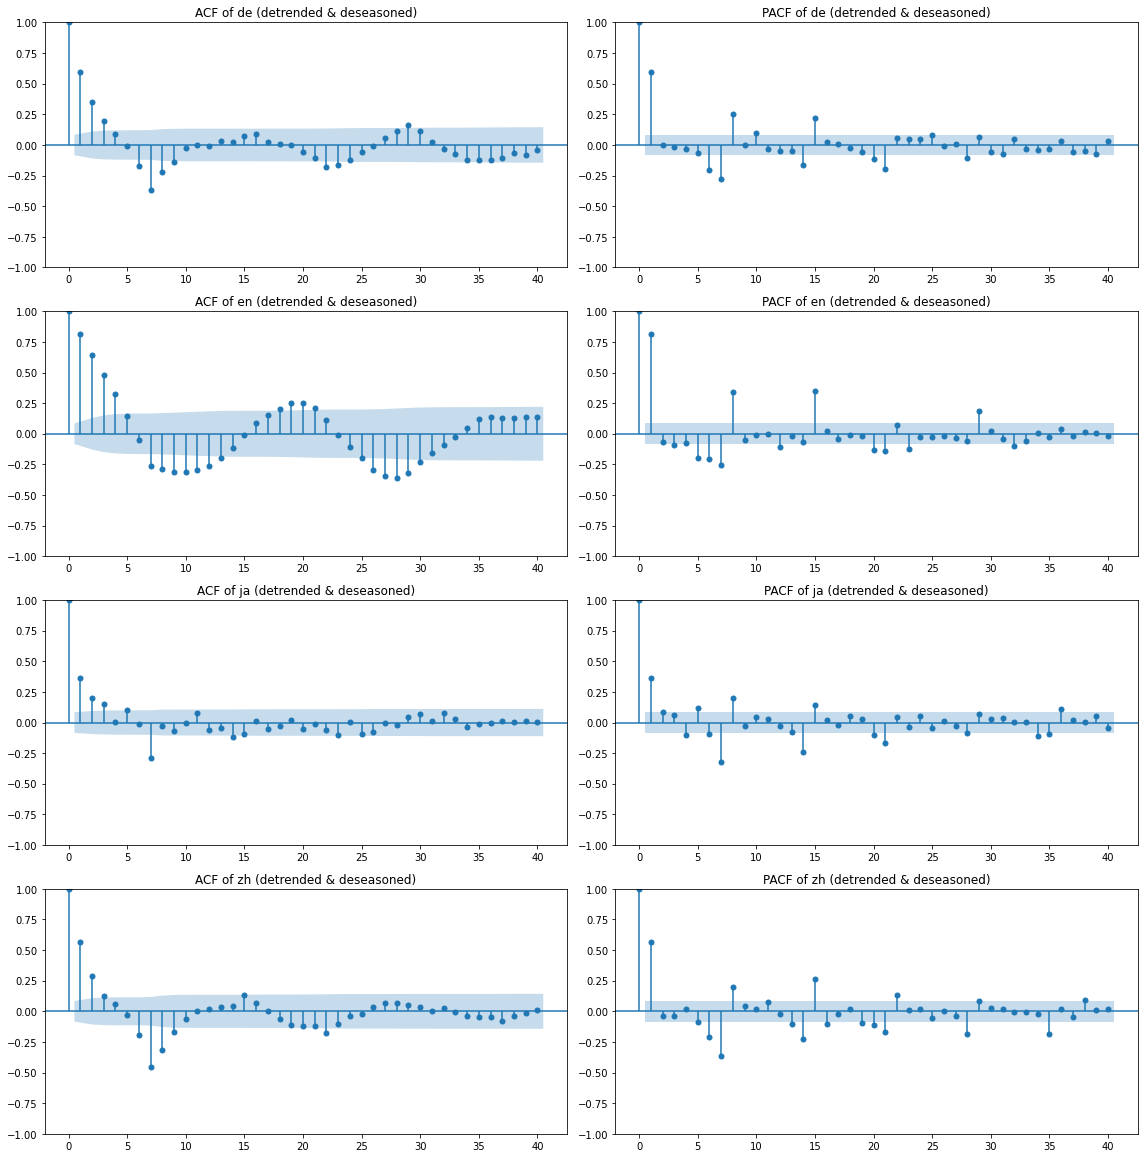

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Define differencing function
def differencing(timeseries, lag=1):
    return timeseries.diff(periods=lag).dropna()

# Detrend and deseason each series in the dataframe
detrended_deseasoned = pd.DataFrame()
seasonal_lag = 7  

for column in ['de', 'en', 'ja', 'zh']:
    if column != 'Exog':  # Assuming 'Exog' is not a time series data to be differenced
        detrended_deseasoned[column] = differencing(l_df_avg[column], lag=seasonal_lag)
    else:
        detrended_deseasoned[column] = l_df_avg[column]

# Create an 8x2 grid for ACF and PACF plots after detrending and deseasoning
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(16, 32))
axes = axes.flatten()

# Plot ACF and PACF for each detrended and deseasoned series
for i, column in enumerate(detrended_deseasoned.columns):
    # Skip plotting for 'Exog' if present
    if column == 'Exog':
        continue
    
    # ACF
    plot_acf(detrended_deseasoned[column].dropna(), lags=40, ax=axes[2*i])
    axes[2*i].set_title(f'ACF of {column} (detrended & deseasoned)')
    
    # PACF
    plot_pacf(detrended_deseasoned[column].dropna(), lags=40, ax=axes[2*i + 1])
    axes[2*i + 1].set_title(f'PACF of {column} (detrended & deseasoned)')

# Remove unused subplots
if len(detrended_deseasoned.columns) < 8:
    for j in range(len(detrended_deseasoned.columns), 8):
        fig.delaxes(axes[2*j])
        fig.delaxes(axes[2*j + 1])

# Adjust layout
plt.tight_layout()
plt.show()


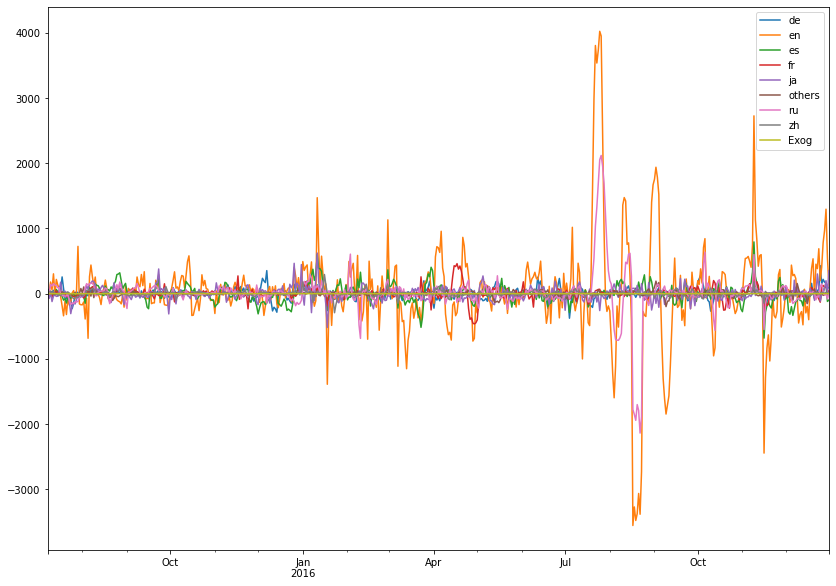

In [22]:
# Define differencing function
def differencing(timeseries, lag=1):
    return timeseries.diff(periods=lag).dropna()

# Initialize an empty DataFrame to store deseasoned and detrended values
deseasoned_detrended_df = pd.DataFrame()

# Define the seasonal lag (e.g., 12 for monthly data with yearly seasonality)
seasonal_lag = 7

# Perform deseasoning and detrending for each language column
for column in l_df_avg.columns:
    if column != 'Exog':  # Assuming 'Exog' is not a time series data to be differenced
        deseasoned_detrended_df[column] = differencing(l_df_avg[column], lag=seasonal_lag)
    else:
        deseasoned_detrended_df[column] = l_df_avg[column]

# Display the resulting DataFrame
deseasoned_detrended_df.plot(figsize=(14,10));



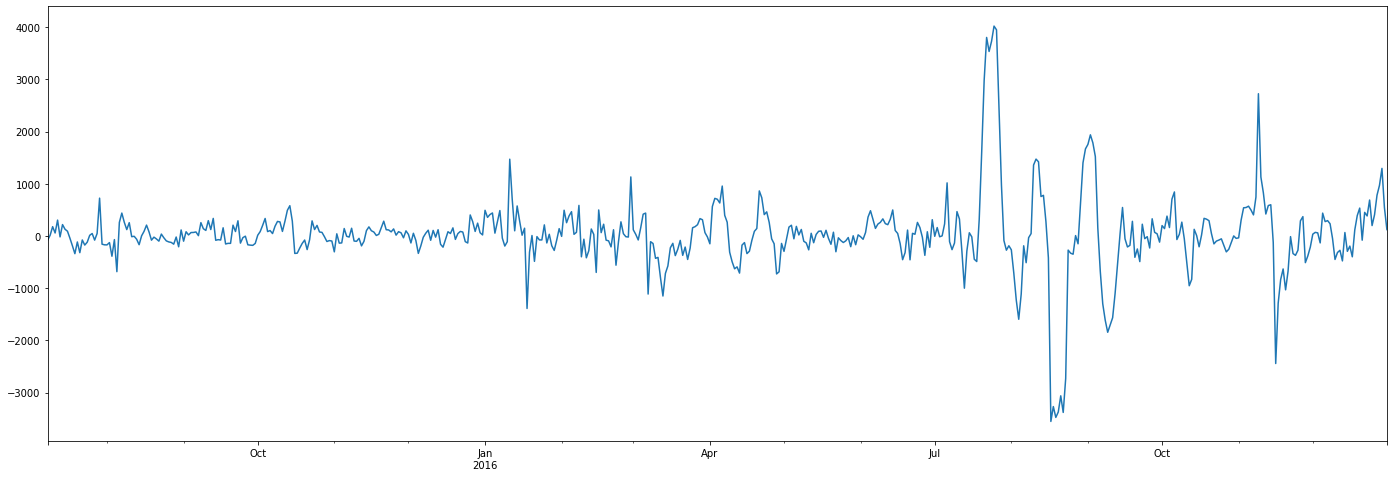

In [23]:
deseasoned_detrended_df['en'].plot(figsize=(24,8));

Model Training

#### Let's start with english first


In [24]:
ml_df = l_df_avg.copy()

# Define the length of the test set as a multiple of 7
test_size = 77

# Split the data into train and test sets
train = ml_df.iloc[:-test_size]['en']
test = ml_df.iloc[-test_size:]['en']

#Exogenous variable
exog_train = ml_df.iloc[:-test_size][['Exog']] 
exog_test = ml_df.iloc[-test_size:][['Exog']]  

In [25]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Fit AR model
ar_model = AutoReg(train, lags=7).fit()
ar_predictions = ar_model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Fit ARIMA model
arima_model = ARIMA(train, order=(5, 1, 0)).fit()
arima_predictions = arima_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Fit SARIMA model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7)).fit()
sarima_predictions = sarima_model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)


In [27]:
# Calculate and print the errors
def calculate_errors(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    return mse, rmse, mae

ar_mse, ar_rmse, ar_mae = calculate_errors(test, ar_predictions)
arima_mse, arima_rmse, arima_mae = calculate_errors(test, arima_predictions)
sarima_mse, sarima_rmse, sarima_mae = calculate_errors(test, sarima_predictions)


print(f'AR Model MSE: {ar_mse}, RMSE: {ar_rmse}, MAE: {ar_mae}')
print(f'ARIMA Model MSE: {arima_mse}, RMSE: {arima_rmse}, MAE: {arima_mae}')
print(f'SARIMA Model MSE: {sarima_mse}, RMSE: {sarima_rmse}, MAE: {sarima_mae}')


AR Model MSE: 574752.3215855734, RMSE: 758.1242125045034, MAE: 561.2402855916475
ARIMA Model MSE: 400732.5376591674, RMSE: 633.0343890020253, MAE: 434.8477600335291
SARIMA Model MSE: 248804.05149799373, RMSE: 498.8026177737981, MAE: 316.95506869215455


In [28]:
# Function to calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Calculate and print the errors including MAPE
ar_mape = calculate_mape(test, ar_predictions)
arima_mape = calculate_mape(test, arima_predictions)
sarima_mape = calculate_mape(test, sarima_predictions)


print(f'AR Model MAPE: {ar_mape}')
print(f'ARIMA Model MAPE: {arima_mape}')
print(f'SARIMA Model MAPE: {sarima_mape}')



AR Model MAPE: 10.137026536951439
ARIMA Model MAPE: 7.816852081292073
SARIMA Model MAPE: 5.809308829467929


SARIMAX

In [ ]:
# Fit SARIMAX model with exogenous variables
sarimax_model = SARIMAX(train, exog=exog_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7)).fit()
sarimax_predictions = sarimax_model.predict(start=len(train), end=len(train) + len(test) - 1, exog=exog_test, dynamic=False)

In [30]:
# Evaluate
sarimax_mse, sarimax_rmse, sarimax_mae = calculate_errors(test, sarimax_predictions)
print(f'SARIMAX Model MSE: {sarimax_mse}, RMSE: {sarimax_rmse}, MAE: {sarimax_mae}')
sarimax_mape = calculate_mape(test, sarimax_predictions)
print(f'SARIMAX Model MAPE: {sarimax_mape}')

SARIMAX Model MSE: 113216.27957956065, RMSE: 336.4762689693891, MAE: 236.57177214424627
SARIMAX Model MAPE: 4.507984224155292


In [33]:
import tqdm as notebook_tqdm
from prophet import Prophet

In [46]:
# Split the data into train and test sets
train = ml_df.iloc[:-test_size][['en', 'Exog']]
test = ml_df.iloc[-test_size:][['en', 'Exog']]
ptrain = train.reset_index()
ptest = test.reset_index()
ptrain.columns = ['ds', 'y', 'regressor']
ptest.columns = ['ds', 'y', 'regressor']

# Prophet
model = Prophet()
model.add_regressor('regressor')
model.fit(ptrain)

#future = model.make_future_dataframe(periods=77)

# Forcast
future = pd.concat([ptrain[['ds', 'y', 'regressor']], ptest[['ds', 'y', 'regressor']]], ignore_index=True)
future.columns = ['ds', 'y', 'regressor']
forecast = model.predict(future)
predictions = forecast[['ds', 'yhat']].set_index('ds').rename(columns={'yhat': 'predicted'})

23:13:07 - cmdstanpy - INFO - Chain [1] start processing
23:13:07 - cmdstanpy - INFO - Chain [1] done processing


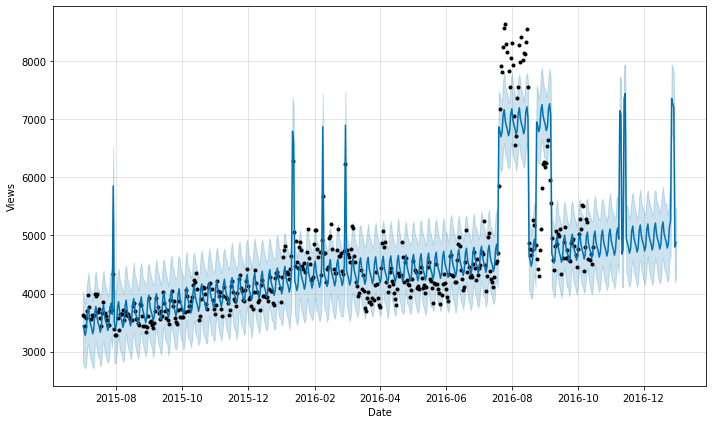

In [51]:
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Views')
plt.show()

Prophet Model MAE: 303.87568283806837, MAPE: 5.578386544416973


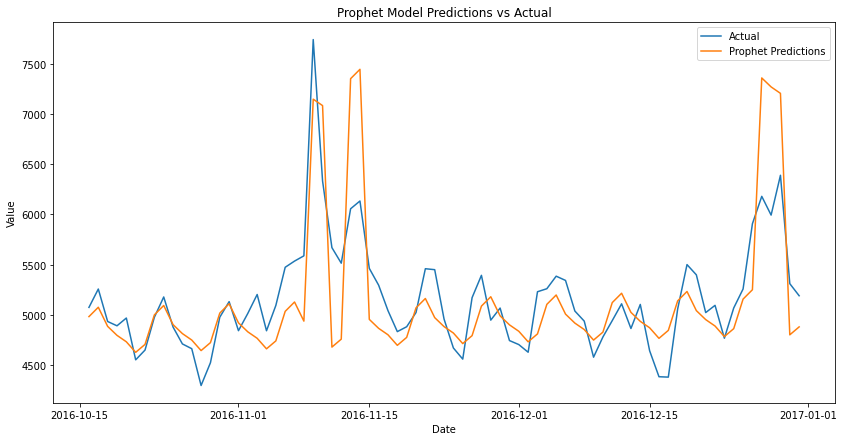

In [47]:
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

##Mape
actual = test['en'].values
predicted = predictions['predicted'][-test_size:].values

mae = mean_absolute_error(actual, predicted)
mape = calculate_mape(actual, predicted)

print(f'Prophet Model MAE: {mae}, MAPE: {mape}')

# Plot the results
plt.figure(figsize=(14, 7))

plt.plot(test.index, actual, label='Actual')
plt.plot(test.index, predicted, label='Prophet Predictions')

plt.legend()
plt.title('Prophet Model Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

## Other Languages

### SARIMAX

In [ ]:
ml_df = l_df_avg.copy()

# Define the length of the test set as a multiple of 7
test_size = 77

langs = ['en','de', 'fr', 'ja', 'zh', 'es', 'ru']

mapes = []
for i in langs:
    # Split the data into train and test sets
    train = ml_df.iloc[:-test_size][i]
    test = ml_df.iloc[-test_size:][i]

    # Fit SARIMA model
    sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7)).fit()
    sarima_predictions = sarima_model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

    sarima_mape = calculate_mape(test, sarima_predictions)
    mapes.append(f'SARIMA Model MAPE: {sarima_mape} for {i}')

In [62]:
for i in mapes:
    print(i) 

SARIMA Model MAPE: 5.809308829467929 for en
SARIMA Model MAPE: 5.69197830889926 for de
SARIMA Model MAPE: 11.328392356533756 for fr
SARIMA Model MAPE: 5.918258470838646 for ja
SARIMA Model MAPE: 10.301929609323441 for zh
SARIMA Model MAPE: 16.917274759728535 for es
SARIMA Model MAPE: 25.07793834438765 for ru


### Prophet